In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D

In [6]:
from google.colab import drive #to import google drive data

In [7]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Mounted at /content/drive


In [8]:
cd /content/drive/"My Drive/Colab Notebooks/LHC-P3"

/content/drive/My Drive/Colab Notebooks/LHC-P3


In [9]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X = data.iloc[:, [3, 4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# TASK1


In [13]:
data_target = data['Genre']

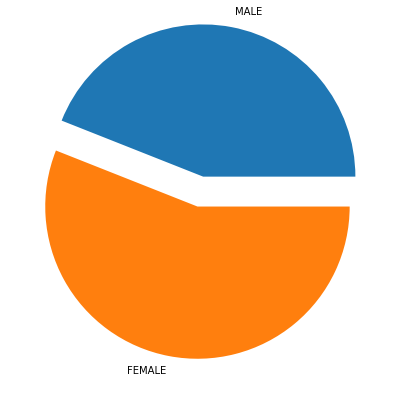

In [14]:
label = ['MALE','FEMALE']
isMale = data.loc[data_target=='Male']
isFemale = data.loc[data_target=='Female']
lenMale = len(isMale)
lenFemale = len(isFemale)
data_plot = [lenMale/(lenMale+lenFemale)*100,lenFemale/(lenMale+lenFemale)*100]
data_plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data_plot, labels = label,explode=[0.2,0.0])
plt.show()

# Task 3

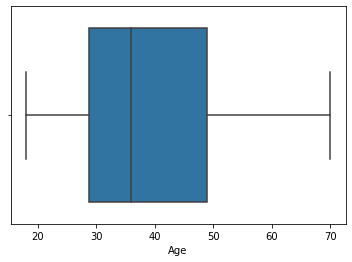

In [15]:
sns.boxplot(x=data["Age"])

# Task 5

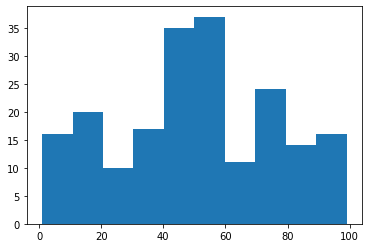

In [16]:
plt.hist(data['Spending Score (1-100)'],bins=10)
plt.show()

#  Task -4


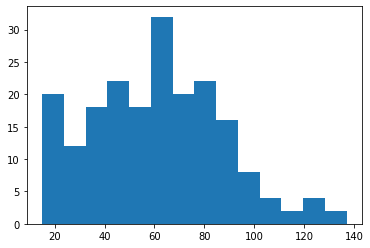

In [17]:
plt.hist(data['Annual Income (k$)'],bins=14)
plt.show()

# TASK 2


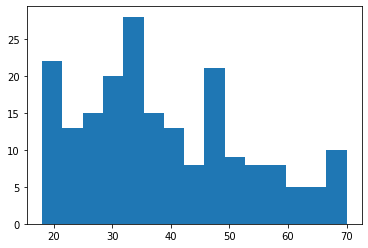

In [18]:
plt.hist(data['Age'],bins=15)
plt.show()

# Task 6

In [19]:
from sklearn.cluster import KMeans

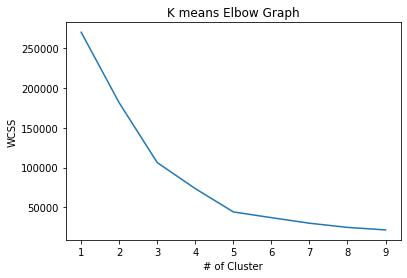

In [20]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

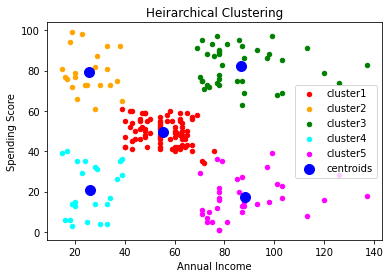

In [22]:
#visualize the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='cyan',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='magenta',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()